                                    #### `in The Name of God                                            `

In [1]:
!git clone https://github.com/cloner174/mr.DGA.git

Cloning into 'mr.DGA'...
remote: Enumerating objects: 488, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 488 (delta 68), reused 136 (delta 66), pack-reused 347
Receiving objects: 100% (488/488), 460.26 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (210/210), done.
Updating files: 100% (90/90), done.


In [2]:
%cd mr.DGA

/content/mr.DGA


In [3]:
import os
import cv2
import time
import warnings
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

#### path to main working files:

In [4]:
emo_map_guide_path = 'data/output/csv/images_emo_map.csv'
valid_data_path = 'data/output/csv/Data-Valid-from-3.6.1.csv.zip'

#### Loading Valid Data:

In [5]:
data = pd.read_csv(valid_data_path, compression='zip')
emo_map_guide = pd.read_csv(emo_map_guide_path, index_col = 4)
print('Data Valid shape: \n' ,data.shape,'\n')
print('Emotion Map-Guide shape: \n' ,emo_map_guide.shape,'\n')
time.sleep(2)
print('Data valid type of pixels: \n' ,type(data[' pixels'][0]),'\n')
time.sleep(2)
print('Data valid head: \n')
print(data.head())
time.sleep(3)
print('\nEmotion Map-Guide head: \n')
print(emo_map_guide.head())
time.sleep(1)

Data Valid shape: 
 (8707, 3) 

Emotion Map-Guide shape: 
 (8707, 4) 

Data valid type of pixels: 
 <class 'str'> 

Data valid head: 

   Unnamed: 0  emotion                                             pixels
0        7059        3  30 26 26 26 26 26 25 24 25 26 26 26 26 27 29 2...
1       26452        5  0 0 0 4 26 29 23 40 100 105 103 103 103 105 11...
2       31551        3  31 30 31 33 41 47 61 74 79 59 59 112 144 134 1...
3        1481        4  32 29 27 30 32 33 40 49 65 86 48 14 8 6 10 17 ...
4       20543        3  60 29 24 40 38 36 29 32 28 25 31 20 23 25 23 2...

Emotion Map-Guide head: 

       Unnamed: 0            name  \
iloc                                
7059            0   face_7059.jpg   
26452           1  face_26452.jpg   
31551           2  face_31551.jpg   
1481            3   face_1481.jpg   
20543           4  face_20543.jpg   

                                                  path  emotion  
iloc                                                             
70

In [6]:
data = data.set_axis(['indx', 'emotion', 'pixels'], axis = 1)
print('Data Valid head after renaming cols: \n')
print(data.head(),'\n')

Data Valid head after renaming cols: 

    indx  emotion                                             pixels
0   7059        3  30 26 26 26 26 26 25 24 25 26 26 26 26 27 29 2...
1  26452        5  0 0 0 4 26 29 23 40 100 105 103 103 103 105 11...
2  31551        3  31 30 31 33 41 47 61 74 79 59 59 112 144 134 1...
3   1481        4  32 29 27 30 32 33 40 49 65 86 48 14 8 6 10 17 ...
4  20543        3  60 29 24 40 38 36 29 32 28 25 31 20 23 25 23 2... 



In [7]:
data = data.set_axis(['indx', 'emotion', 'pixels'], axis = 1)
print('Data Valid head after renaming cols: \n\n','\n'), data.head(2)

Data Valid head after renaming cols: 

 



(None,
     indx  emotion                                             pixels
 0   7059        3  30 26 26 26 26 26 25 24 25 26 26 26 26 27 29 2...
 1  26452        5  0 0 0 4 26 29 23 40 100 105 103 103 103 105 11...)

In [8]:
def strings_with_number_inside( data,
                                    index_iloc = None,
                                    label_iloc = None,
                                    column_range_starts : int = 0,
                                    column_range_ends : int = None,
                                    seperator = None):
        start = column_range_starts
        end = int( data.shape[1] ) if column_range_ends is None else column_range_ends
        new_data = []
        try :
            for i in range( data.shape[0] ) :
                temp_new_data = {}
                for j in range( start, end ) :
                    cells_real_values = np.array(data.iloc[i, j].split(sep = seperator), dtype='uint8')
                    if index_iloc is not None:
                      temp_new_data['index'] = data.iloc[i, index_iloc]
                    else:
                      temp_new_data['index'] = i
                    temp_new_data['pixels'] = cells_real_values
                    if label_iloc:
                      temp_new_data['emotin'] = data.iloc[i, label_iloc]
                new_data.append(temp_new_data)
            return new_data
        except:
            if isinstance( data , np.array ) :
                pass
            else:
                raise TypeError( " data just could be  PandasDataFrame  or  NumpyArray  ! ")

In [9]:
data.head()

,indx,emotion,pixels
0,7059,3,30 26 26 26 26 26 25 24 25 26 26 26 26 27 29 2...
1,26452,5,0 0 0 4 26 29 23 40 100 105 103 103 103 105 11...
2,31551,3,31 30 31 33 41 47 61 74 79 59 59 112 144 134 1...
3,1481,4,32 29 27 30 32 33 40 49 65 86 48 14 8 6 10 17 ...
4,20543,3,60 29 24 40 38 36 29 32 28 25 31 20 23 25 23 2...


In [10]:
data_fixed = strings_with_number_inside(data, index_iloc = 0, label_iloc = 1, column_range_starts = 2)

In [11]:
data_fixed = pd.DataFrame(data_fixed)
print('Data Valid head after fixing the type of each pixel rows: \n\n')
print(data_fixed.head(),'\n')
time.sleep(2)
print('\n', 'We are going to call the fixed-Data-Valid , -> data_fixed <- since now on : \n\n' ,'\n')

Data Valid head after fixing the type of each pixel rows: 


   index                                             pixels  emotin
0   7059  [30, 26, 26, 26, 26, 26, 25, 24, 25, 26, 26, 2...       3
1  26452  [0, 0, 0, 4, 26, 29, 23, 40, 100, 105, 103, 10...       5
2  31551  [31, 30, 31, 33, 41, 47, 61, 74, 79, 59, 59, 1...       3
3   1481  [32, 29, 27, 30, 32, 33, 40, 49, 65, 86, 48, 1...       4
4  20543  [60, 29, 24, 40, 38, 36, 29, 32, 28, 25, 31, 2...       3 


 We are going to call the fixed-Data-Valid , -> data_fixed <- since now on : 

 



#### Some fixing of data to be ready


In [12]:
data_fixed = data_fixed.set_index('index')
data_fixed.sort_index(inplace=True)
emo_map_guide.sort_index(inplace=True)
print(emo_map_guide.head(3))
print('\n', data_fixed.head(3))

      Unnamed: 0        name                                         path  \
iloc                                                                        
0           1655  face_0.jpg  data/output/pic/Faces-from-3.6.1/face_0.jpg   
4           7659  face_4.jpg  data/output/pic/Faces-from-3.6.1/face_4.jpg   
5             56  face_5.jpg  data/output/pic/Faces-from-3.6.1/face_5.jpg   

      emotion  
iloc           
0           0  
4           6  
5           2  

                                                   pixels  emotin
index                                                           
0      [70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...       0
4      [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...       6
5      [55, 55, 55, 55, 55, 54, 60, 68, 54, 85, 151, ...       2


#### Adding additional information to our fixed_data

In [13]:
emo_map_guide.head()

,Unnamed: 0,name,path,emotion
iloc,,,,
0,1655,face_0.jpg,data/output/pic/Faces-from-3.6.1/face_0.jpg,0
4,7659,face_4.jpg,data/output/pic/Faces-from-3.6.1/face_4.jpg,6
5,56,face_5.jpg,data/output/pic/Faces-from-3.6.1/face_5.jpg,2
7,4237,face_7.jpg,data/output/pic/Faces-from-3.6.1/face_7.jpg,3
8,3564,face_8.jpg,data/output/pic/Faces-from-3.6.1/face_8.jpg,3


In [14]:
data_fixed['name'] = emo_map_guide['name']
data_fixed['path'] = emo_map_guide['path']
data_fixed['back_up_emotion'] = emo_map_guide['emotion']

data_fixed.head()

,pixels,emotin,name,path,back_up_emotion
index,,,,,
0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",0,face_0.jpg,data/output/pic/Faces-from-3.6.1/face_0.jpg,0
4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",6,face_4.jpg,data/output/pic/Faces-from-3.6.1/face_4.jpg,6
5,"[55, 55, 55, 55, 55, 54, 60, 68, 54, 85, 151, ...",2,face_5.jpg,data/output/pic/Faces-from-3.6.1/face_5.jpg,2
7,"[77, 78, 79, 79, 78, 75, 60, 55, 47, 48, 58, 7...",3,face_7.jpg,data/output/pic/Faces-from-3.6.1/face_7.jpg,3
8,"[85, 84, 90, 121, 101, 102, 133, 153, 153, 169...",3,face_8.jpg,data/output/pic/Faces-from-3.6.1/face_8.jpg,3


In [15]:
unmatch_emotions_police = []

for any_ in data_fixed.index:
  if data_fixed.loc[any_, 'emotin'] != data_fixed.loc[any_, 'back_up_emotion']:
    unmatch_emotions_police.append(any_)
    warnings.warn(f" One or more NoN-Match Items founded in data// this time index number : {any_}")
  else:
    pass
if len(unmatch_emotions_police)==0:
  print(" Data was Seccessfuly Scaned and there is NO unmatch items. ")

 Data was Seccessfuly Scaned and there is NO unmatch items. 


*Some Function to We Use Them Further in This Script :*

In [16]:
def show(image_array, are_you_using_colab, show_before, show_after, face):
    if are_you_using_colab:
        try:
            from google.colab.patches import cv2_imshow
        except ImportError:
            print('google.colab is not in your local environment')
            return 0
        if show_before:
            print('Before Cropping:')
            cv2_imshow(image_array)
        if show_after:
            print('After Cropping:')
            cv2_imshow(face)
    else:
        try:
            plt.imshow(face)
            plt.show()
        except Exception as e:
            print("An error occurred: ", e)
            print("Sorry, face was detected but we can only show it inside Google Colab.")
            time.sleep(1)
            print("Try using cv2.imshow('Window Name', VALUE_FROM_THIS_METHOD) to see the result!")
    return 0

In [17]:
def save_array_to_file(array, directory, filename):

    if not os.path.exists(directory):
        os.makedirs(directory)
    path = os.path.join(directory, filename)
    np.save(path, array)
    return path

#### pre-trained face detection model for face area cropping


In [18]:
model = "models/face_detector_advance/res10_300x300_ssd_iter_140000.caffemodel"
config = "models/face_detector_advance/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(config, model)

In [19]:
def adjust_and_crop_faces(image_array_input, directory='data/output/csv/cropped-arrays', image_size=(48, 48), show_=False,
                          return_cropped_array=False, save_one_dimensional=False,
                          name_or_id='id', target_to_write=None,
                          target_name_for_return_dict='target', index=0,
                          show_after=True, show_before=True, are_you_using_colab=True, min_dim_size = 5):
    image_array = np.array(image_array_input, dtype=np.uint8).reshape(image_size[0], image_size[1])
    image_rgb = np.stack((image_array,) * 3, axis=-1)
    blob = cv2.dnn.blobFromImage(image_rgb)
    net.setInput(blob)
    detections = net.forward()
    face = None
    if detections.shape[2] > 0:
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                box = detections[0, 0, i, 3:7] * np.array([image_array.shape[1], image_array.shape[0], image_array.shape[1], image_array.shape[0]])
                (startX, startY, endX, endY) = box.astype("int")
                startX, startY = max(0, startX), max(0, startY)
                endX, endY = min(image_array.shape[1], endX), min(image_array.shape[0], endY)
                face = image_array[startY:endY, startX:endX]
                if face.size > 0:
                    break
    if face is not None and face.size > 0:
        try:
            cropped_face_image = Image.fromarray(face)
            if cropped_face_image.width < min_dim_size or cropped_face_image.height < min_dim_size:
                return None
            aspect_ratio = cropped_face_image.width / cropped_face_image.height
            if aspect_ratio < 0.2 or aspect_ratio > 5:
                return None
        except Exception as e:
            print("An error occurred while processing the face image: ", e)
            return None
        if return_cropped_array:
            if save_one_dimensional:
                face = face.reshape(-1)
        else:
            if show_:
                show(image_array, are_you_using_colab, show_before, show_after, face)
            return 0
        filename = f"{name_or_id}_{index}.npy"
        path_to_face_array = save_array_to_file(face, directory, filename)
        cropped_array = {
            'index': index,
            'name': name_or_id,
            'pixel': path_to_face_array,
            target_name_for_return_dict: target_to_write
        }
        if show_:
            show(image_array, are_you_using_colab, show_before, show_after, face)
        return cropped_array
    else:
        return None



##### * test:*



In [21]:
image_array = data_fixed['pixels'][4]

test_cropped_face = adjust_and_crop_faces(image_array, return_cropped_array=True)

print(type(test_cropped_face), '\n','columns in result data : ',list(test_cropped_face.keys()), '\n',test_cropped_face['pixel'])#, test_cropped_face['pixel'].shape

<class 'dict'> 
 columns in result data :  ['index', 'name', 'pixel', 'target'] 
 data/output/csv/cropped-arrays/id_0.npy


### loop inside all!

In [23]:
no_face_after_addjust = []
cropped_array = []
for indx, cols in data_fixed.iterrows():
  image_array = cols['pixels']
  face_temp = adjust_and_crop_faces(image_array,
                                      directory = 'data/output/csv/Cropped Arrays/',
                                      return_cropped_array=True,
                                      name_or_id = cols['name'],
                                      target_to_write = cols['emotin'],
                                      target_name_for_return_dict = 'emotion',
                                      index = indx)
  if face_temp is None :
    no_face_after_addjust.append(indx)
  else:
    cropped_array.append(face_temp)

In [24]:
print('Length of Not Faces after Crop : ', len(no_face_after_addjust))
print('Length of Faces after Crop : ', len(cropped_array))

Length of Not Faces after Crop :  86
Length of Faces after Crop :  8621


In [25]:
print(" Here is Some of indexes of invalid images or simply no faces!! ")
np.random.shuffle(no_face_after_addjust)
no_face_after_addjust[:10]

 Here is Some of indexes of invalid images or simply no faces!! 


[29760, 25484, 17603, 15719, 35622, 202, 33423, 17308, 869, 8720]

Example of non valid pixels :


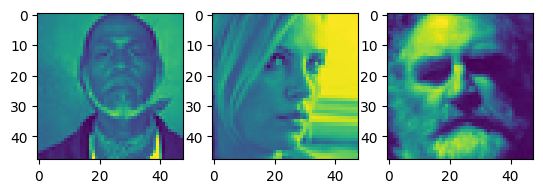

In [27]:
print('Example of non valid pixels :')

fig, ax = plt.subplots(1, 3)
ax[0].imshow(data_fixed['pixels'][29760].reshape(48,48))
ax[1].imshow(data_fixed['pixels'][17308].reshape(48,48))
ax[2].imshow(data_fixed['pixels'][869].reshape(48,48))
plt.show()

Example of valid pixels But before crop :


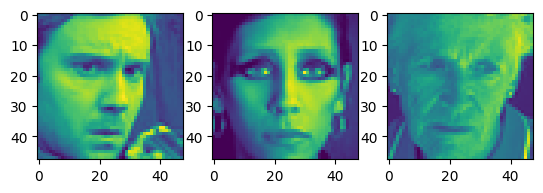

In [28]:
print('Example of valid pixels But before crop :')

fig, ax = plt.subplots(1, 3)
ax[0].imshow(data_fixed['pixels'][0].reshape(48,48))
ax[1].imshow(data_fixed['pixels'][4].reshape(48,48))
ax[2].imshow(data_fixed['pixels'][50].reshape(48,48))
plt.show()

In [34]:
cropped_array_df = pd.DataFrame(cropped_array)

cropped_array_df.to_csv('Cropped-Faces-DataFrame-from-4.7.0.csv', index = False)

cropped_array_df.head()

,index,name,pixel,emotion
0,0,face_0.jpg,data/output/csv/Cropped Arrays/face_0.jpg_0.npy,0
1,4,face_4.jpg,data/output/csv/Cropped Arrays/face_4.jpg_4.npy,6
2,5,face_5.jpg,data/output/csv/Cropped Arrays/face_5.jpg_5.npy,2
3,7,face_7.jpg,data/output/csv/Cropped Arrays/face_7.jpg_7.npy,3
4,8,face_8.jpg,data/output/csv/Cropped Arrays/face_8.jpg_8.npy,3


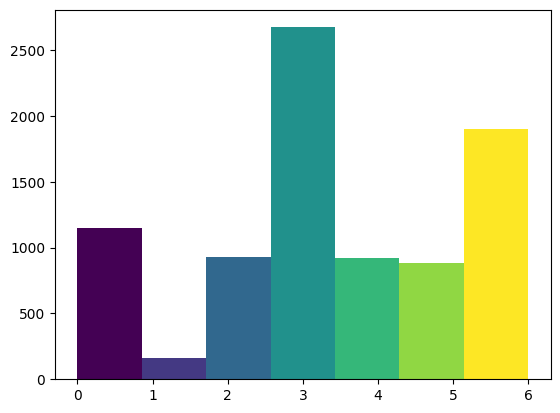

In [30]:
from matplotlib import pyplot as plt

colors = ['red','white','blue','yellow','orange','green', 'black']

cmap = plt.cm.viridis

counts, bins, patches = plt.hist(cropped_array_df['emotion'], bins=7)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

plt.show()

### Saving our result for finaly step ###

In [ ]:
#!zip -r 'Cropped-Faces-DataFrame-from-4.7.0.zip' '/content/mr.DGA/data/output/csv/Cropped Arrays/'

In [32]:
#from google.colab import files
#files.download('/content/mr.DGA/Cropped-Faces-DataFrame-from-4.7.0.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Just Make Sure Everything os OK!
'Example of valid pixels AFTER CROP '


array([[ 70,  80,  82, ..., 129, 110, 113],
       [ 65,  61,  58, ..., 167, 116,  95],
       [ 50,  43,  54, ..., 190, 145,  86],
       ...,
       [ 91,  65,  42, ..., 173,  98,  36],
       [ 77,  82,  79, ..., 137, 130, 125],
       [ 77,  72,  84, ..., 138, 150, 148]], dtype=uint8)
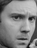

In [35]:
np.load('data/output/csv/Cropped Arrays/face_0.jpg_0.npy')

array([[ 0,  0,  0, ..., 17,  7,  5],
       [ 0,  0,  0, ..., 13,  9,  2],
       [ 0,  0,  0, ..., 11,  8,  3],
       ...,
       [ 0,  0,  0, ..., 34, 32, 33],
       [ 0,  0,  0, ..., 33, 30, 29],
       [ 0,  0,  0, ..., 31, 31, 27]], dtype=uint8)
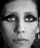

In [36]:
np.load('data/output/csv/Cropped Arrays/face_4.jpg_4.npy')

array([[124, 129, 128, ..., 218, 218, 211],
       [126, 126, 128, ..., 211, 215, 206],
       [126, 130, 132, ..., 198, 202, 208],
       ...,
       [ 69,  67,  66, ..., 101, 101, 101],
       [ 68,  68,  68, ..., 101, 102,  97],
       [ 67,  67,  68, ..., 102, 104,  93]], dtype=uint8)
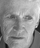

In [37]:
np.load('data/output/csv/Cropped Arrays/face_50.jpg_50.npy')

#### Load DataFrame With Pathes to arrays of cropped faces . To Make Sure !

In [38]:
df = pd.read_csv('data/output/csv/Cropped-Faces-DataFrame-from-4.7.0.csv')

In [39]:
shuffled = df.sample(frac=1, random_state=1)
print("Shuffled DataFrame:\n", shuffled.head(3))

Shuffled DataFrame:
       index            name  \
4869  20287  face_20287.jpg   
103     389    face_389.jpg   
642    2697   face_2697.jpg   

                                                  pixel  emotion  
4869  data/output/csv/Cropped Arrays/face_20287.jpg_...        0  
103   data/output/csv/Cropped Arrays/face_389.jpg_38...        2  
642   data/output/csv/Cropped Arrays/face_2697.jpg_2...        5  


In [40]:
shuffled.set_index('index', inplace=True)

In [41]:
print("Shuffled DataFrame:\n", shuffled.head(3))

Shuffled DataFrame:
                  name                                              pixel  \
index                                                                      
20287  face_20287.jpg  data/output/csv/Cropped Arrays/face_20287.jpg_...   
389      face_389.jpg  data/output/csv/Cropped Arrays/face_389.jpg_38...   
2697    face_2697.jpg  data/output/csv/Cropped Arrays/face_2697.jpg_2...   

       emotion  
index           
20287        0  
389          2  
2697         5  


Loaded array for face_20287.jpg from data/output/csv/Cropped Arrays/face_20287.jpg_20287.npy

  -->> Emotion Label -->>  0 


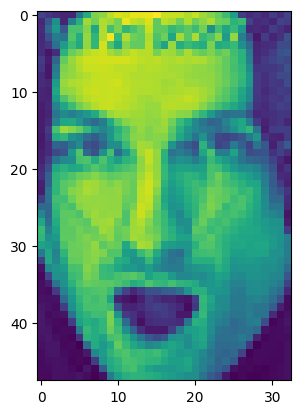

Loaded array for face_389.jpg from data/output/csv/Cropped Arrays/face_389.jpg_389.npy

  -->> Emotion Label -->>  2 


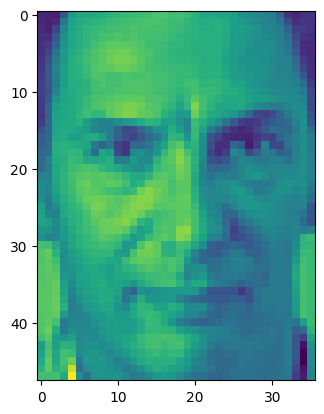

Loaded array for face_2697.jpg from data/output/csv/Cropped Arrays/face_2697.jpg_2697.npy

  -->> Emotion Label -->>  5 


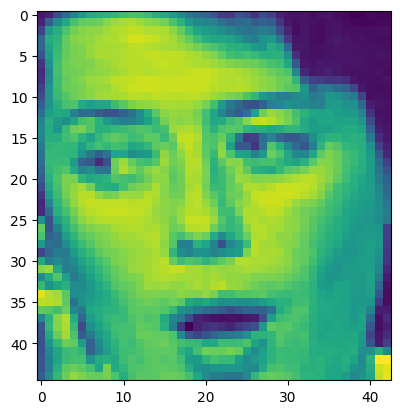

Loaded array for face_8361.jpg from data/output/csv/Cropped Arrays/face_8361.jpg_8361.npy

  -->> Emotion Label -->>  4 


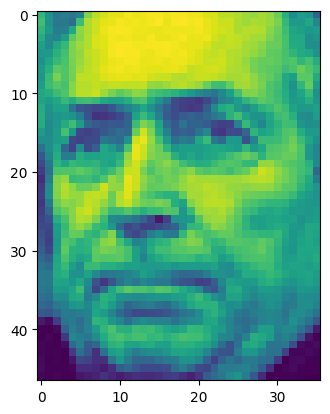

Loaded array for face_29085.jpg from data/output/csv/Cropped Arrays/face_29085.jpg_29085.npy

  -->> Emotion Label -->>  0 


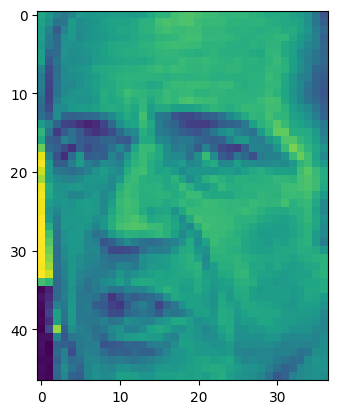

Loaded array for face_15636.jpg from data/output/csv/Cropped Arrays/face_15636.jpg_15636.npy

  -->> Emotion Label -->>  3 


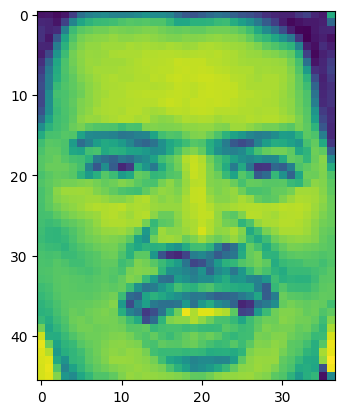

Loaded array for face_4434.jpg from data/output/csv/Cropped Arrays/face_4434.jpg_4434.npy

  -->> Emotion Label -->>  0 


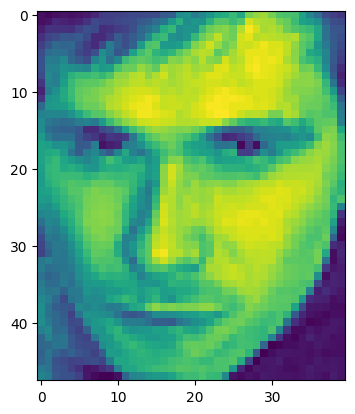

Loaded array for face_17406.jpg from data/output/csv/Cropped Arrays/face_17406.jpg_17406.npy

  -->> Emotion Label -->>  3 


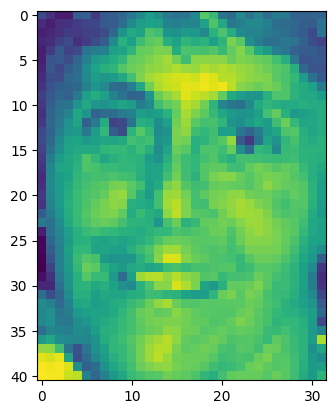

Loaded array for face_20688.jpg from data/output/csv/Cropped Arrays/face_20688.jpg_20688.npy

  -->> Emotion Label -->>  3 


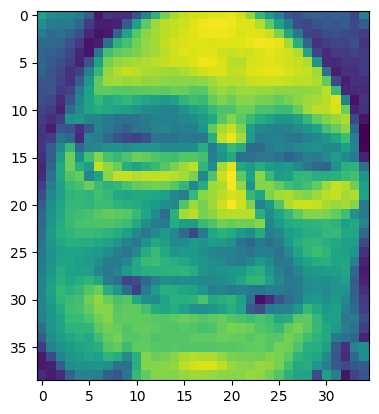

Loaded array for face_14399.jpg from data/output/csv/Cropped Arrays/face_14399.jpg_14399.npy

  -->> Emotion Label -->>  3 


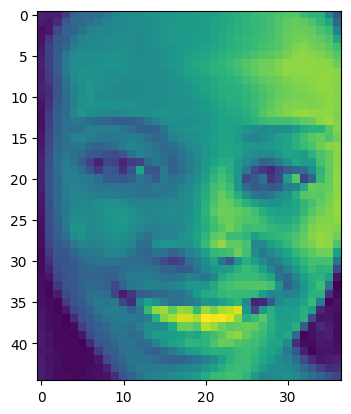

In [42]:
def load_array_from_path(path):
    return np.load(path)
df = shuffled
i = 0
lim = 10
# Loop through the DataFrame and load arrays
for idx, row in df.iterrows():
    i += 1
    array_path = row['pixel']
    array = load_array_from_path(f"data/output/csv/Cropped Arrays/face_{idx}.jpg_{idx}.npy")
    print(f"Loaded array for {row['name']} from {array_path}" )
    print('\n', f" -->> Emotion Label -->>  {row['emotion']} ")
    plt.imshow(array)
    plt.show()
    if i == lim:
      break


In [45]:
print(" The Final DataSet is 'Cropped-Faces-DataFrame-from-4.7.0.csv' ")
print("                           And")
print("           'Cropped-Faces-DataFrame-from-4.7.0.zip' ")
print('')
print('                    ^        ^          ^')
print('                    ^        ^          ^ ')
print('                    |        |          | ')
print('              ')
print("   Now We Have Path to Our Images Which All of them Now Are Can be followd and will have been locating!!")
print('')

 The Final DataSet is 'Cropped-Faces-DataFrame-from-4.7.0.csv' 
                           And
           'Cropped-Faces-DataFrame-from-4.7.0.zip' 

                    ^        ^          ^
                    ^        ^          ^ 
                    |        |          | 
              
Now We Have Path to Our Images Which All of them Now Are Can be followd and will have been locating!!

